# Pubmed Central (PMC) Exploratory Data Analysis

This notebook is designed to generate descriptive statistics for the PMC repository.

In [1]:
import os
from pathlib import Path 
from collections import Counter

import pandas as pd
import plotnine as p9
import lxml.etree as ET
import tqdm

# Journal Statistics

Gather a listing of journals contained in PMC.

In [2]:
journals = Path("../journals").rglob("*.nxml")

In [3]:
journal_paper_count = Counter(map(lambda x: os.path.dirname(x).split("/")[1], journals))
journal_records = [{
    'journal':item[0],
    'article_count':item[1]
    }
    for item in journal_paper_count.items()
]

In [4]:
journal_df = (
    pd.DataFrame
    .from_records(journal_records)
    .sort_values("journal")
    .reset_index(drop=True)
)
journal_df.head()

,journal,article_count
0,20_Century_Br_Hist,2
1,3D_Print_Med,55
2,3_Biotech,640
3,AAPS_J,64
4,AAPS_Open,1


## Map Journals to PMC articles

In [5]:
journal_type_records = []
for file in tqdm.tqdm_notebook(journals):
    journal = os.path.dirname(file).split("/")[1]
    tree = ET.parse(file)
    root = tree.getroot()
    journal_type_records.append({
        'journal': journal,
        'article_type': root.attrib['article-type'].strip(),
        'pmcid':os.path.splitext(os.path.basename(file))[0]
    })

In [6]:
journal_paper_df = pd.DataFrame.from_records(journal_type_records)
journal_paper_df.to_csv("output/pubmed_central_journal_paper_map.tsv.xz", sep="\t", index=False, compression="xz")
journal_paper_df.head()

,journal,article_type,pmcid
0,Environ_Health,research-article,PMC1552054
1,Environ_Health,research-article,PMC1226148
2,Environ_Health,correction,PMC6124016
3,Environ_Health,research-article,PMC5635510
4,Environ_Health,research-article,PMC3125232


In [7]:
journal_paper_df.journal.unique().shape

(9393,)

# Types of Articles Contained in PMC

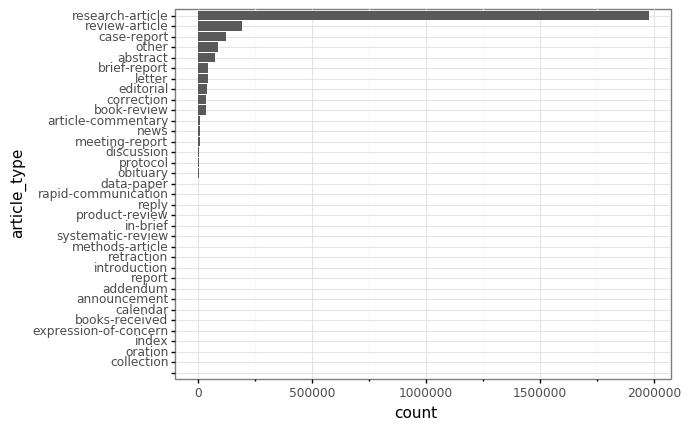

<ggplot: (-9223363309153683056)>


In [9]:
journal_article_type_list = journal_paper_df['article_type'].value_counts().index.tolist()[::-1]

g = (
    p9.ggplot(journal_paper_df)
    + p9.aes(x="article_type")
    + p9.geom_bar(position="dodge")
    + p9.scale_x_discrete(limits=journal_article_type_list)
    + p9.coord_flip()
    + p9.theme_bw()
)
g.save("output/figures/article_sections.png", dpi=500)
print(g)